In [1]:
import numpy as np 
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Punto 1

In [2]:
def SOR(A,b,x0,w, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(1,itmax):
        
        
        for i in range(A.shape[0]):
            
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            x[i] = (1-w)*x[i]+w*(b[i] - sum_)/A[i,i]
            
       
        
        residuo = np.linalg.norm( np.dot(A,x) - b )
   
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x

In [3]:
A = np.array([[2.,-1.],[1.,2.],[1.,1.]])
b = np.array([2.,1.,4.])
x0=np.zeros([2,1])
M=A.T@A
S=A.T@b


In [4]:
PC=SOR(M,S,x0,1)

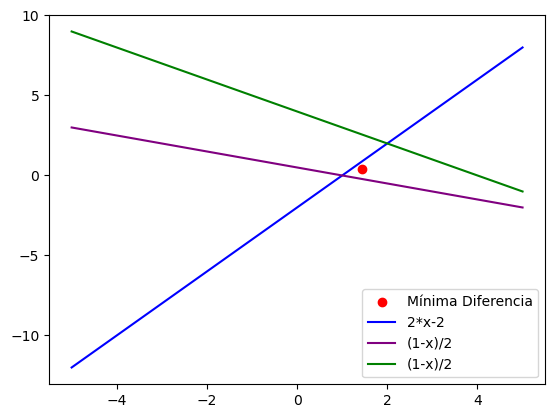

In [5]:
x=np.linspace(-5,5,1001)
y=np.linspace(-5,5,1001)


f1=2*x-2
f2=(1-x)/2
f3=4-x

plt.scatter(PC[0],PC[1], color='r', label='Mínima Diferencia')
plt.plot(x,f1 , color='b', label='2*x-2')
plt.plot(x,f2, color='purple', label='(1-x)/2')
plt.plot(x,f3, color='g',label='(1-x)/2')
plt.legend()
plt.show()

In [6]:
X,Y=np.meshgrid(x,y)
Z=np.zeros((len(X),len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        
        dmin=np.linalg.norm((A@(np.array([x[i],y[j]])))-b)
        Z[i,j]=dmin

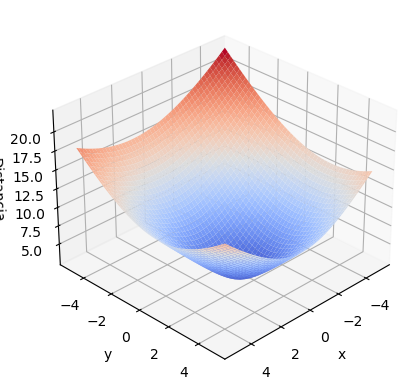

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia')
ax.view_init(30,45)
plt.show()

# Punto 7

In [208]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
data = pd.read_csv(url)

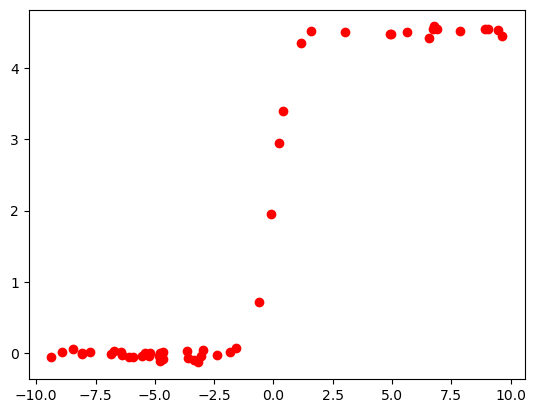

In [299]:
plt.scatter(data['x'], data['y'], color='r')

In [268]:
def model(x, vtheta):
    
    M=vtheta[0]/(vtheta[1]+np.e**(-vtheta[2]*x))
    return M


In [269]:
def fcost(x,y, vtheta):
    
    suma=0
    for i in range(len(y)):
        suma+=(y-model(x, vtheta))**2
        
    result= suma*-2
    
    return result

        

$b)$ Muestre que las derivadas parciales de la métrica están dadas por:


$X^2\left(\vec{\theta}\right)=\sum_{i=1}^{N}\left(\frac{y_i-M\left(x_{i,}\vec{\theta}\right)}{\sigma_i}\right)^2\ \ \ (1)$


Derivando la ecuación $(1)$ da:

$\frac{\partial\ X^2\left(\vec{\theta}\right)}{\partial\theta_i}=\frac{\partial(\sum_{i=1}^{N}{\left(\frac{y_i-M\left(x_{i,}\vec{\theta}\right)}{\sigma_i}\right)^2)}}{\partial\theta_i}=\sum_{i=1}^{N}\frac{{\partial\left(\frac{y_i-M\left(x_{i,}\vec{\theta}\right)}{\sigma_i}\right)}^2}{\partial\theta_i}$

$\sum_{i=1}^{N}2\left(\frac{y_i-M\left(x_{i,}\vec{\theta}\right)}{\sigma_i}\right)\left(-\frac{\partial\ M\left(x_{i,}\vec{\theta}\right)}{\partial\theta_i}\right)=-2\sum_{i=1}^{N}{\left(\frac{y_i-M\left(x_{i,}\vec{\theta}\right)}{\sigma_i}\right)\frac{\partial\ M\left(x_{i,}\vec{\theta}\right)}{\partial\theta_i}}$

Dando así:

$\frac{\partial\ X^2\left(\vec{\theta}\right)}{\partial\theta_i}=-2\sum_{i=1}^{N}{\left(y_i-M\left(x_{i,}\vec{\theta}\right)\right)\frac{\partial\ M\left(x_{i,}\vec{\theta}\right)}{\partial\theta_i}}\ \ \ \ (2)$

$c)$ Muestre que las derivadas parciales de la métrica están dadas por:


Los valores para $\vec{x_1}$ están dados por:

$\vec{x_1}=\vec{x_0}-\gamma\nabla\vec{F}(\vec{x_0})$

Y para $\vec{x_2}$:

$\vec{x_2}=\vec{x_1}-\gamma\nabla\vec{F}(\vec{x_1})$

Por lo que se puede generalizar de la siguiente manera para $\vec{x_{n+1}}$ :

$\vec{x_{n+1}}=\vec{x_n}-\gamma\nabla\vec{F}(\vec{x_n})$

Sin embargo, nuestro $\vec{x}$ es $\vec{\theta}$, es decir:

$\vec{x_{n+1}}=\vec{\theta_{j+1}} $

Por lo que $\vec{\theta_{n+1}}$ esta dado por:

$\vec{\theta_{j+1}}=\vec{\theta_j}-\gamma\nabla\vec{F}(\vec{\theta_j})$

Y nuestra función multivariable con valores escalares, F es la función de costo $X^2(\vec{\theta})$.
Por lo que la expresión queda de la siguiente manera:

$\vec{\theta_{j+1}}=\vec{\theta_j}-\gamma\nabla\vec{X^2}(\vec{\theta_j})$

Dada la ecuación (2), $\vec{\theta_{j+1}}$ estaría definido como:

$\vec{\theta_{j+1}}=\vec{\theta_j}-\gamma\left(-2\sum_{i=1}^{N}{\left(y_i-M\left(x_{i,}\vec{\theta_j}\right)\right)\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_i}}\right)\ (3)$

Si $\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_i}\$ 
se desarrolla para i=0,1,2

$\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_i}=\left[\ \frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_0},\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_1},\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_2}\right]\ (4)$

Es decir, la ecuación (4) sería el operador gradiente. Por lo tanto, quedaría de la siguiente manera:

$\mathrm{\nabla}_\theta M\left(x_i,\vec{\theta_j}\right)=\frac{\partial\ M\left(x_{i,}\vec{\theta_j}\right)}{\partial\theta_i}\ (5)$

Reemplazando la ecuación (5) dentro de la ecuación (3), da como resultado:

$\vec{\theta_{j+1}}=\vec{\theta_j}-\gamma\left(-2\sum_{i=1}^{N}{\left(y_i-M\left(x_{i,}\vec{\theta_j}\right)\right)\mathrm{\nabla}_\theta M\left(x_i,\vec{\theta_j}\right)}\right)$


In [270]:
def dM(f,x,theta, h, dr):
    #print(theta+2*h*dr)
    result=-f(x,theta+2*h*dr)+8*f(x,theta+h*dr)-8*f(x,theta-h*dr)+f(x,theta-2*h*dr)
    
    return result/((12*h))

In [271]:
def derivative(f,x,df,pts,h):
    
    #functions=np.array([f1,f2,f3])
    G = np.zeros(len(pts))
    
    for i in range(len(pts)):

        dr=np.zeros(len(pts))
        
        dr[i]=1
            #print(dr)
        G[i]=df(f,x,pts,h,dr)
        
    return G

In [272]:
pts=np.array([1.,1.,1.])
h=0.01

In [273]:
Gradiente(model,1,dM,pts, h)

array([ 0.73105858, -0.53444664,  0.19661193])

In [278]:
def Gradiente(f,x,y,df,dM,vtheta,h):
    
    suma=0
    for i in range(len(x)):
        suma+= (-2)*(y[i]-f(x[i],vtheta))*(df(f,x[i],dM, vtheta,h))
    return suma

In [297]:
vtheta=np.ones(3)

In [298]:
e=0.01
itmax=1e4
gamma1=1e-3
gamma2=5e-4

In [304]:
i=0
trayect=np.array([])
while itmax>i and error>e:
    vtheta= vtheta - gamma2 * Gradiente(model, data['x'],data['y'], derivative, dM, vtheta, e)
    trayect=np.append(trayect, vtheta)
    
    error=abs(trayect[i]-trayect[i-1])
    
    i+=1


In [305]:
xc=(min(data['x']),max(data['x']))
X=np.linspace(xc[0],xc[1], 100)
Y=np.array([])
for i in X:
    Y=np.append(Y, model(i,vtheta))

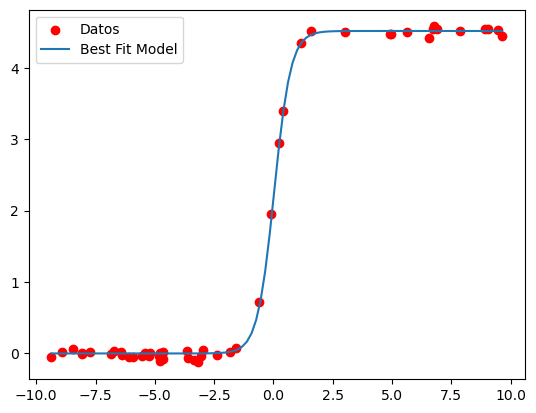

In [307]:
plt.scatter(data['x'],data['y'], color='r', label='Datos')
plt.plot(X,Y, label='Best Fit Model')
plt.legend()